<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/stanley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [7]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [8]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,...,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,...,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,...,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,...,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,...,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,...,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,...,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,...,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


In [9]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
GDG,3
GGD,3
KDSLS,148489
KEL,3
ITEM,3


**Yang Saya Dapatkan Dari EDA Diatas**
1. **Kelengkapan Data**:
   - Beberapa kolom, seperti `KDSUP`, `BIN`, `PTS_GDG`, `JLH_DIS`, dan `NO_ORD`, memiliki banyak nilai null atau kosong, menunjukkan ketidakterpakaian atau kurangnya relevansi data tersebut.
   - Kolom yang hampir lengkap, seperti `KD_SBR`, `TP_TRN`, `KEL`, `NAMA`, `HRG_PKK`, dan `JLH_TRANS`, menandakan data yang penting dan dapat diandalkan untuk analisis lebih lanjut.

2. **Distribusi Missing Values**:
   - Kolom dengan tingkat missing values yang sangat tinggi, seperti `KDSLS`, `KDBIN`, `PTS_ITEM`, `JLH_DIS`, dll., kemungkinan tidak akan memberikan kontribusi yang signifikan pada analisis.
   - Kolom dengan missing values sedang, seperti `KAS` (12,195), `STS_BYR` (12,195), dan `PPN` (1,889), mungkin dapat diisi dengan metode tertentu (misalnya, mean, median, atau modus).

3. **Informasi Penting untuk Analisis**:
   - Kolom transaksi seperti `NO_BKT`, `TGL_TRANS`, `NAMA`, `QTY`, `JLH_TRANS`, dan `HRG_PKK` sangat penting untuk menunjukkan detail transaksi dan dapat digunakan untuk menganalisis pola pembelian atau kinerja produk.
   - Kolom harga, seperti `HRG_PKK` (Harga Pokok), `HRG_JUL` (Harga Jual), dan `DISC` (Diskon), relevan untuk analisis profitabilitas.
   - Kolom waktu seperti `TGL_TRANS` dan `TANGGAL` penting untuk menganalisis pola pembelian harian atau musiman.

4. **Anomali**:
   - Beberapa kolom memiliki nilai yang selalu kosong (`KDSLS`, `KDBIN`, `PTS_GDG`, dll.), sehingga sebaiknya dihapus karena tidak memberikan kontribusi.
   - Kolom seperti `LAMA_CRD` hanya memiliki 37 nilai yang terisi, menunjukkan ketidaksesuaian atau ketidakrelevanan.

5. **Volume Data**:
   - Dataset ini mencakup 148,489 baris dan 61 kolom, dengan 39 kolom numerik dan sisanya adalah string atau datetime.
   - Memori ukuran 69.1 MB menandakan bahwa dataset ini cukup besar untuk diproses langsung.

Oleh karena itu, saya akan menghapus kolom yang tidak perlu.

In [10]:
unimportant_columns = [
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 'NO_ORD',
    'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD', 'DISC1', 'DISC2',
    'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 'HRGJL1_OLD',
    'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 'PPN_OLD',
    'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 'QTY_PTS',
    'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 'DEP_SWA', 'GON',
    'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 'TANGGAL', 'JAM', 'LAMA_CRD'
]

df.drop(unimportant_columns, axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KD_SBR,TP_TRN,KAS,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS
0,IN,JUL,6.0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,2200.0,CASH DISCOUNT
1,IN,JUL,6.0,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,23000.0,CASH DISCOUNT
2,IN,JUL,6.0,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,9500.0,CASH DISCOUNT
3,IN,JUL,6.0,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,6900.0,CASH DISCOUNT
4,IN,JUL,6.0,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,13500.0,CASH DISCOUNT


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   KD_SBR     148486 non-null  object        
 1   TP_TRN     148486 non-null  object        
 2   KAS        136294 non-null  float64       
 3   KEL        148486 non-null  object        
 4   ITEM       148486 non-null  float64       
 5   NAMA       148486 non-null  object        
 6   TGL_TRANS  148486 non-null  datetime64[ns]
 7   NO_BKT     148486 non-null  object        
 8   STS_BYR    136294 non-null  object        
 9   QTY        148486 non-null  float64       
 10  HRG_PKK    148486 non-null  float64       
 11  HRG_JUL    148486 non-null  float64       
 12  DISC       146957 non-null  float64       
 13  PPN        146600 non-null  float64       
 14  JLH_TRANS  148486 non-null  float64       
 15  KET_TRANS  148486 non-null  object        
dtypes: datetime64[ns](1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,KAS,ITEM,TGL_TRANS,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS
count,136294.000000,148486.000000,148486,148486.000000,148486.000000,148486.000000,146957.000000,146600.000000,1.484860e+05
mean,4.497381,21322.181445,2017-01-15 21:02:24.159045376,3.163174,19901.017212,21795.990560,0.437617,0.334158,6.137361e+04
min,1.000000,1.000000,2017-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,5221.000000,2017-01-07 00:00:00,1.000000,3728.920000,4425.000000,0.000000,0.000000,5.800000e+03
50%,5.000000,13839.000000,2017-01-15 00:00:00,1.000000,8365.180000,9600.000000,0.000000,0.000000,1.270000e+04
75%,6.000000,35802.750000,2017-01-25 00:00:00,2.000000,17769.380000,20200.000000,0.000000,0.000000,3.060000e+04
max,15.000000,700047.000000,2017-01-31 00:00:00,2000.000000,720000.000000,900000.000000,50.000000,10.000000,3.778570e+07
std,1.906136,25881.022963,NaN,16.266576,38566.965857,40289.934102,2.475039,1.631778,3.981378e+05


In [13]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
KD_SBR,3
TP_TRN,3
KAS,12195
KEL,3
ITEM,3
NAMA,3
TGL_TRANS,3
NO_BKT,3
STS_BYR,12195
QTY,3


In [14]:
columns_to_drop_null = ['KD_SBR', 'TP_TRN', 'KEL', 'ITEM', 'NAMA', 'TGL_TRANS', 'NO_BKT',
                        'QTY', 'HRG_PKK', 'HRG_JUL', 'JLH_TRANS', 'KET_TRANS']
df.dropna(subset=columns_to_drop_null, inplace=True)

df['KAS'].fillna(df['KAS'].mode()[0], inplace=True)
df['STS_BYR'].fillna(df['STS_BYR'].mode()[0], inplace=True)
df['DISC'].fillna(df['DISC'].mean(), inplace=True)
df['PPN'].fillna(df['PPN'].mode()[0], inplace=True)

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-bacc9d4ababa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KAS'].fillna(df['KAS'].mode()[0], inplace=True)
<ipython-input-14-bacc9d4ababa>:6: FutureWar

,0
KD_SBR,0
TP_TRN,0
KAS,0
KEL,0
ITEM,0
NAMA,0
TGL_TRANS,0
NO_BKT,0
STS_BYR,0
QTY,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-4832d3b6011f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_sales.index, x=product_sales.values, palette='coolwarm')


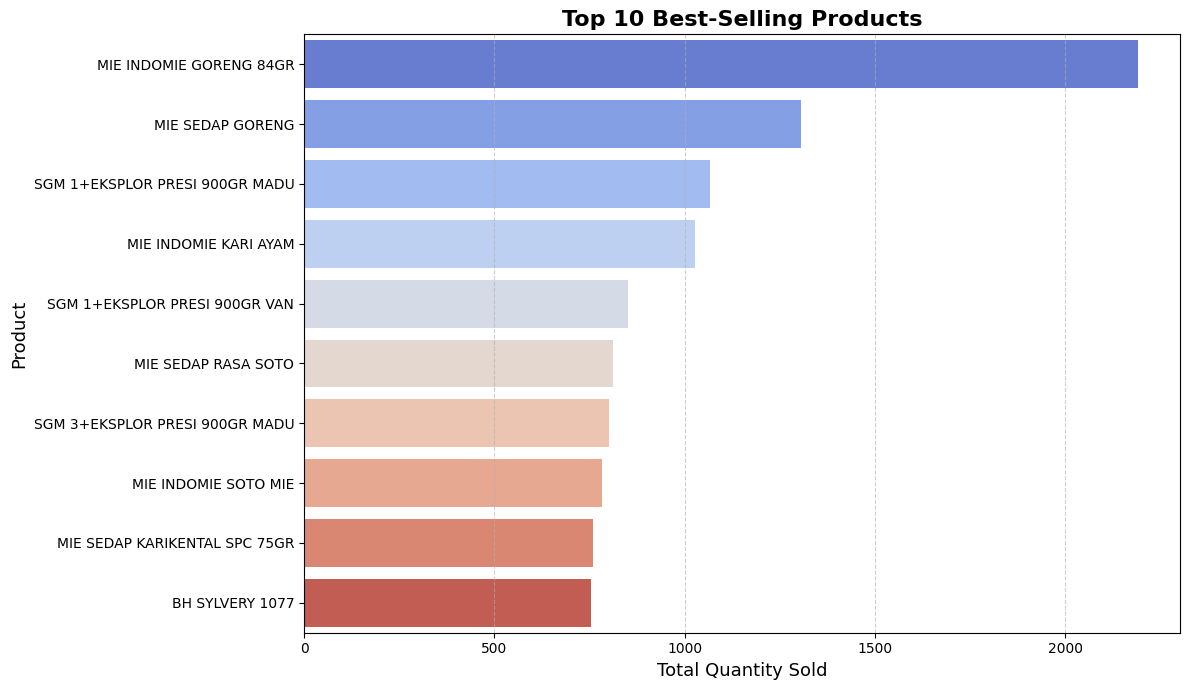

In [24]:
# Calculate the total quantity sold for each product
product_sales = df.groupby('NAMA')['QTY'].sum().nlargest(10)

# Create a bar plot to visualize the top-selling products
plt.figure(figsize=(12, 7))
sns.barplot(y=product_sales.index, x=product_sales.values, palette='coolwarm')
plt.title('Top 10 Best-Selling Products', fontsize=16, weight='bold')
plt.xlabel('Total Quantity Sold', fontsize=13)
plt.ylabel('Product', fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Grafik bar horizontal menampilkan 10 produk dengan jumlah penjualan tertinggi. **Mie Indomie Goreng 84GR** menempati posisi teratas sebagai produk terlaris, diikuti oleh **Telur Ayam Horen / Ons**. Sementara itu, penjualan produk lain menunjukkan angka yang lebih rendah dengan variasi yang cukup besar di antaranya.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


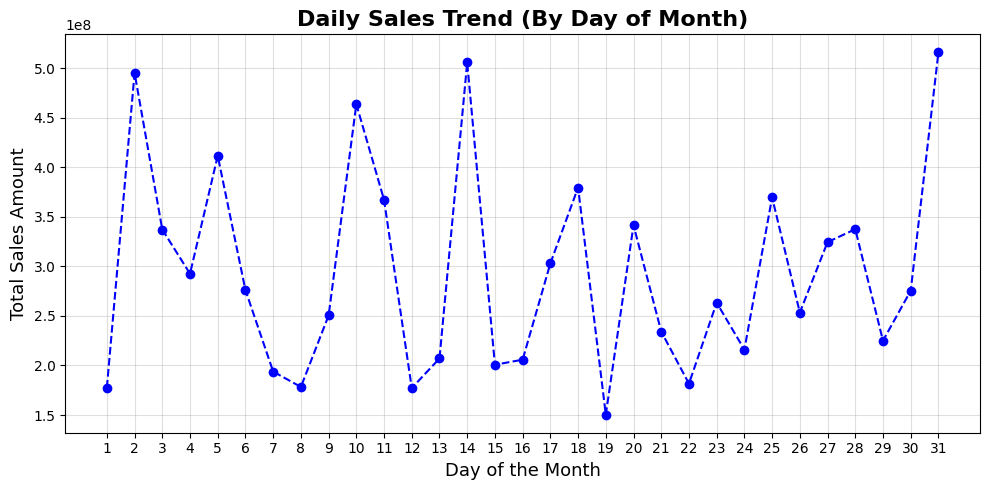

In [25]:
# Convert transaction dates to datetime format
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'])

# Extract the day of the month from the transaction date
df['Day_of_Month'] = df['TGL_TRANS'].dt.day

# Calculate total sales for each day of the month
sales_per_day = df.groupby('Day_of_Month')['JLH_TRANS'].sum().reset_index()

# Plot the daily sales trend
plt.figure(figsize=(10, 5))
plt.plot(
    sales_per_day['Day_of_Month'],
    sales_per_day['JLH_TRANS'],
    marker='o',
    color='blue',
    linestyle='--'
)
plt.title('Daily Sales Trend (By Day of Month)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Month', fontsize=13)
plt.ylabel('Total Sales Amount', fontsize=13)
plt.grid(alpha=0.4)
plt.xticks(ticks=range(1, 32), fontsize=10)  # Assumes maximum day is 31
plt.tight_layout()
plt.show()


Grafik garis menggambarkan tren penjualan harian selama satu bulan. Penjualan terlihat berfluktuasi secara signifikan, dengan puncak tertinggi terjadi pada hari ke-2, ke-10, dan ke-31. Pola ini kemungkinan dipengaruhi oleh promosi tertentu atau kebiasaan belanja pelanggan pada hari-hari tertentu.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


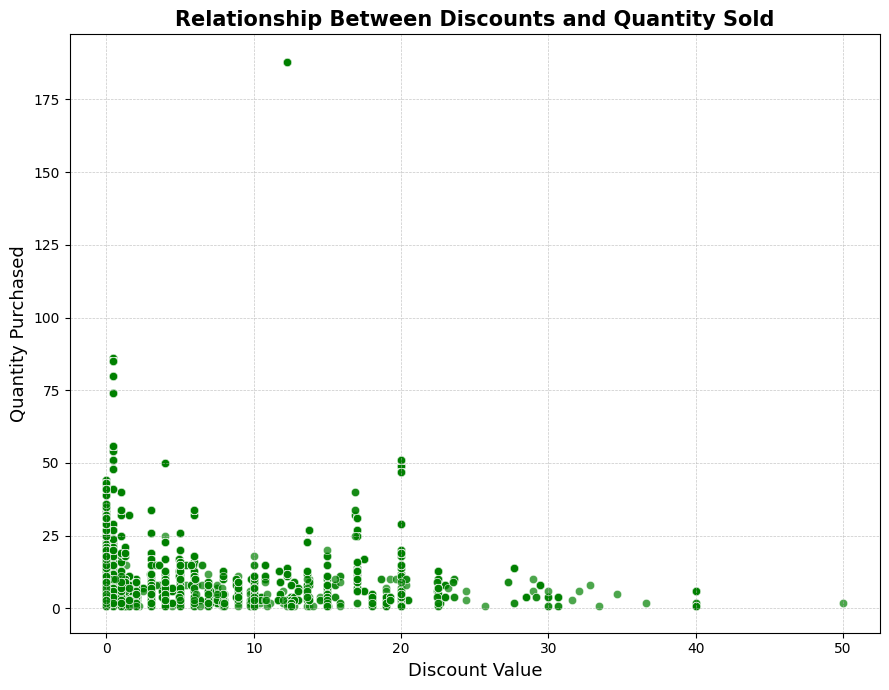

In [26]:
# Scatter plot to analyze the relationship between discounts and quantity sold
plt.figure(figsize=(9, 7))
sns.scatterplot(data=df, x='DISC', y='QTY', color='green', alpha=0.7)
plt.title('Relationship Between Discounts and Quantity Sold', fontsize=15, weight='bold')
plt.xlabel('Discount Value', fontsize=13)
plt.ylabel('Quantity Purchased', fontsize=13)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Grafik scatter memperlihatkan hubungan antara besaran diskon yang diberikan dengan jumlah produk yang terjual. Dari distribusi data, terlihat bahwa mayoritas penjualan terjadi pada rentang diskon kecil (0–10). Namun, terdapat beberapa *outlier* berupa jumlah penjualan yang tinggi meskipun diskon yang diberikan relatif rendah. Hal ini mengindikasikan bahwa pemberian diskon besar tidak selalu berbanding lurus dengan peningkatan jumlah pembelian.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-88230d9773b4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sales_by_payment.values, x=sales_by_payment.index, palette='mako')


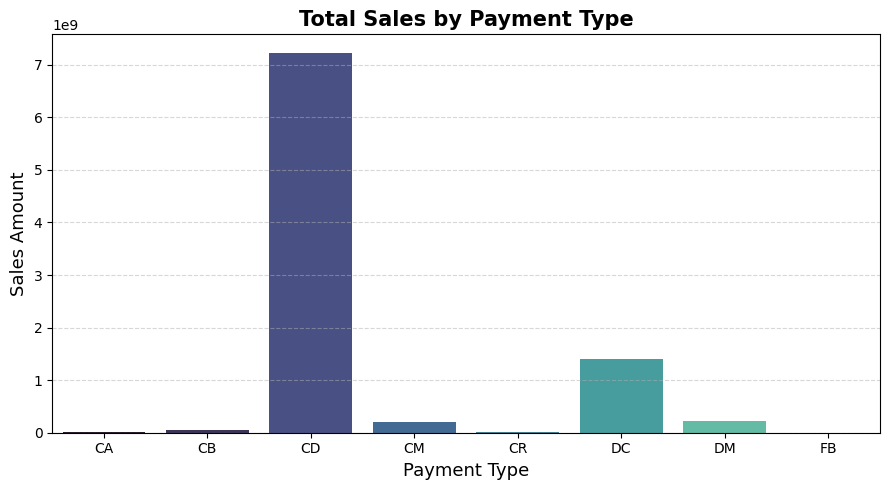

In [27]:
# Aggregate total sales by payment status
sales_by_payment = df.groupby('STS_BYR')['JLH_TRANS'].sum()

# Visualize sales distribution by payment method
plt.figure(figsize=(9, 5))
sns.barplot(y=sales_by_payment.values, x=sales_by_payment.index, palette='mako')
plt.title('Total Sales by Payment Type', fontsize=15, fontweight='bold')
plt.xlabel('Payment Type', fontsize=13)
plt.ylabel('Sales Amount', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

1. **CA (Cash)**: Transaksi dilakukan menggunakan uang tunai.  
2. **CB (Cashback)**: Pembayaran dengan mekanisme cashback, di mana sebagian dana dikembalikan kepada pelanggan.  
3. **CD (Credit Card)**: Transaksi yang menggunakan kartu kredit sebagai metode pembayaran.  
4. **CM (Credit Memo)**: Pembayaran atau penyesuaian transaksi melalui nota kredit.  
5. **CR (Credit Transfer)**: Transfer antar rekening, seperti melalui bank atau layanan digital.  
6. **DC (Debit Card)**: Pembayaran yang dilakukan dengan kartu debit.  
7. **DM (Direct Money)**: Pembayaran langsung, termasuk transfer uang secara instan.  
8. **FB (Financing/Billing)**: Pembayaran dengan skema pembiayaan atau penagihan, misalnya melalui pihak ketiga atau cicilan.

**Penjelasan Grafik**:  
- **Sumbu X (horizontal)**: Memperlihatkan berbagai metode pembayaran yang disingkat, seperti CA, CB, CD, dan lainnya.  
- **Sumbu Y (vertikal)**: Menampilkan total penjualan, kemungkinan dalam skala besar (dalam miliaran atau 1e9).  
- **Batang (Bar)**: Tinggi batang merepresentasikan total penjualan untuk setiap metode pembayaran.

**Temuan Utama**:  
- Metode **"CD" (Credit Card)** mencatat penjualan tertinggi dibandingkan metode lain.  
- **"DC" (Debit Card)** juga menunjukkan kontribusi penjualan yang cukup besar.  
- Metode pembayaran lain seperti **"CA" (Cash)**, **"CB" (Cashback)**, dan **"CM" (Credit Memo)** memiliki nilai penjualan yang lebih rendah secara relatif.

In [19]:
df['QTY'] = df.groupby(['NO_BKT', 'KEL'])['KEL'].transform('count')

data = df.drop_duplicates(subset=['NO_BKT', 'KEL'])

transaction_data = df.pivot_table(index='NO_BKT', columns='KEL', values='QTY', aggfunc='sum').fillna(0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0005/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-72fc2290764b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0005/0117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.024106,(BTL/DOT)
5,0.032360,(COKLAT)
6,0.026593,(DDORANT)
7,0.083607,(DETERJN)
8,0.028507,(GULA)
9,0.021373,(HBL)


In [22]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SNACK),(BISCPAK),0.068984,0.063600,0.021974,0.318542,5.008515,0.017587,1.374112,0.859642
1,(BISCPAK),(SNACK),0.063600,0.068984,0.021974,0.345509,5.008515,0.017587,1.422504,0.854699
2,(DETERJN),(MIE),0.083607,0.078878,0.023259,0.278195,3.526894,0.016664,1.276137,0.781831
3,(MIE),(DETERJN),0.078878,0.083607,0.023259,0.294872,3.526894,0.016664,1.299612,0.777817
4,(DETERJN),(SOFTENR),0.083607,0.042883,0.027605,0.330173,7.699413,0.024019,1.428902,0.949505
5,(SOFTENR),(DETERJN),0.042883,0.083607,0.027605,0.643722,7.699413,0.024019,2.572131,0.909105
6,(DETERJN),(SUSU KT),0.083607,0.166503,0.023997,0.287022,1.723828,0.010076,1.169036,0.458205
7,(SUSU KT),(DETERJN),0.166503,0.083607,0.023997,0.144123,1.723828,0.010076,1.070707,0.503776
8,(PAMPERS),(P GIGI),0.139718,0.076227,0.020608,0.147496,1.934954,0.009958,1.083600,0.561667
9,(P GIGI),(PAMPERS),0.076227,0.139718,0.020608,0.270348,1.934954,0.009958,1.179030,0.523064


In [23]:
high_lift_rules = rules[rules['lift'] > 1.5]

for index, row in high_lift_rules.iterrows():
    print(f"Consider placing {list(row['antecedents'])} near {list(row['consequents'])}.")

Consider placing ['SNACK'] near ['BISCPAK'].
Consider placing ['BISCPAK'] near ['SNACK'].
Consider placing ['DETERJN'] near ['MIE'].
Consider placing ['MIE'] near ['DETERJN'].
Consider placing ['DETERJN'] near ['SOFTENR'].
Consider placing ['SOFTENR'] near ['DETERJN'].
Consider placing ['DETERJN'] near ['SUSU KT'].
Consider placing ['SUSU KT'] near ['DETERJN'].
Consider placing ['PAMPERS'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['PAMPERS'].
Consider placing ['SABUN.M'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['SABUN.M'].
Consider placing ['SHAMPOO'] near ['P GIGI'].
Consider placing ['P GIGI'] near ['SHAMPOO'].
Consider placing ['SABUN.M'] near ['PAMPERS'].
Consider placing ['PAMPERS'] near ['SABUN.M'].
Consider placing ['PAMPERS'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['PAMPERS'].
Consider placing ['SABUN.M'] near ['SHAMPOO'].
Consider placing ['SHAMPOO'] near ['SABUN.M'].
Consider placing ['SABUN.M', 'SHAMPOO'] near ['P GIGI'].
Consider placing ['SA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Kesimpulan dan Interpretasi**

1. **Keterkaitan Produk**:
   - Beberapa pasangan produk menunjukkan hubungan yang kuat, seperti:
     - *SNACK* dan *BISCPAK* memiliki *confidence* tinggi (0.31 dan 0.34) serta *lift* signifikan (5.01), menunjukkan bahwa pembelian satu produk terkait erat dengan pembelian produk lainnya.
     - *SOFTENR* dan *DETERJN* menunjukkan *confidence* 0.64 dengan *lift* yang sangat tinggi (7.70), menunjukkan keduanya sering dibeli bersama.
     - Produk pembersih seperti *SABUN.M*, *SHAMPOO*, dan *P GIGI* memiliki *confidence* > 0.5 dan *lift* > 5, menunjukkan kombinasi produk yang populer.

2. **Item Set yang Lebih Kompleks**:
   - Kombinasi produk seperti *P GIGI* dengan *SHAMPOO* menunjukkan *confidence* tinggi terhadap *SABUN.M* (0.63) dengan *lift* 7.25. Ini menunjukkan pola pembelian yang lebih kompleks di mana pelanggan sering membeli kelompok produk pembersih bersama-sama.

3. **Produk dengan Hubungan Lemah**:
   - Beberapa produk seperti *DETERJN* dan *SUSU KT* memiliki *lift* yang lebih rendah (1.72), menunjukkan hubungan yang lebih lemah dibandingkan pasangan lainnya. Ini mungkin disebabkan oleh perbedaan fungsi produk atau pola belanja pelanggan.

### **Rekomendasi dan Solusi**

1. **Strategi Penempatan Produk**:
   - Tempatkan produk dengan *confidence* dan *lift* tinggi di lokasi berdekatan, seperti:
     - *SNACK* di dekat *BISCPAK*.
     - *SOFTENR* di dekat *DETERJN*.
     - Produk pembersih seperti *P GIGI*, *SHAMPOO*, dan *SABUN.M* dalam satu area yang sama.
   - Ini dapat mendorong pembelian impulsif karena pelanggan dapat dengan mudah melihat produk terkait.

2. **Promosi Paket Bundling**:
   - Buat paket promosi untuk produk yang sering dibeli bersama, seperti:
     - *SOFTENR* dan *DETERJN*.
     - *P GIGI*, *SHAMPOO*, dan *SABUN.M*.
   - Tawarkan diskon tambahan jika produk dibeli dalam satu paket untuk meningkatkan total penjualan.

3. **Optimalisasi Stok**:
   - Prioritaskan stok untuk produk dengan asosiasi kuat (*SNACK*, *BISCPAK*, *DETERJN*, *SOFTENR*) karena permintaan yang lebih tinggi.
   - Pastikan stok kombinasi produk pembersih lengkap karena sering dibeli bersama.

4. **Promosi Tertarget**:
   - Luncurkan kampanye promosi yang menargetkan pasangan produk dengan korelasi tinggi, seperti:
     - Diskon tambahan untuk pembelian *SHAMPOO* jika pelanggan membeli *SABUN.M* atau *P GIGI*.

5. **Analisis Pelanggan Lebih Lanjut**:
   - Pelajari lebih lanjut pola belanja pelanggan di hari-hari tertentu (misalnya, korelasi dengan hasil tren harian sebelumnya). Misalnya, fokuskan promosi di hari-hari dengan penjualan tertinggi seperti hari ke-2, 10, dan 31 untuk memaksimalkan pendapatan.

Dengan menerapkan rekomendasi di atas, kita dapat meningkatkan penjualan, mendorong pembelian impulsif, dan memperkuat loyalitas pelanggan terhadap produk tertentu.